The aim of the project is to predict whether the client will leave the bank in the near future or not. We have historical data on customer behavior and termination of agreements with the bank.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Data preparation

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv('/kaggle/input/churn1/churn (1).csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


So, 3 columns have the object format: Surname, Geography, Gender; there are 3 float variables (Tenure, Balance, EstimatedSalary). Other columns are int variables. We need to change the format of the Tenure variable from float to int. We also should deal with missing values in the Tenure column.

In [6]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
data['Tenure'].isnull().sum() / data['Tenure'].count() * 100

9.99890001099989

In [8]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

When checking for missing values, they were only found in the 'Tenure' column. Number of missing values = 909, or about 10%. Let's replace the missing data with the median value of the column.

In [9]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [10]:
data.duplicated().sum() #duplicates' check

0

There is no any duplicate in our dataset

In [11]:
#let's change the type of the Tenure column
data['Tenure'] = data['Tenure'].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 2. EDA

In [13]:
corr = data[['Exited', 'EstimatedSalary', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Age', 'CreditScore']].corr() #let's begin from the correlation table
print(corr)

                   Exited  EstimatedSalary  IsActiveMember  HasCrCard  \
Exited           1.000000         0.012097       -0.156128  -0.007138   
EstimatedSalary  0.012097         1.000000       -0.011421  -0.009933   
IsActiveMember  -0.156128        -0.011421        1.000000  -0.011866   
HasCrCard       -0.007138        -0.009933       -0.011866   1.000000   
NumOfProducts   -0.047820         0.014204        0.009612   0.003183   
Balance          0.118533         0.012797       -0.010084  -0.014858   
Tenure          -0.015989         0.010049       -0.030681   0.025979   
Age              0.285323        -0.007201        0.085472  -0.011721   
CreditScore     -0.027094        -0.001384        0.025651  -0.005458   

                 NumOfProducts   Balance    Tenure       Age  CreditScore  
Exited               -0.047820  0.118533 -0.015989  0.285323    -0.027094  
EstimatedSalary       0.014204  0.012797  0.010049 -0.007201    -0.001384  
IsActiveMember        0.009612 -0.010084 

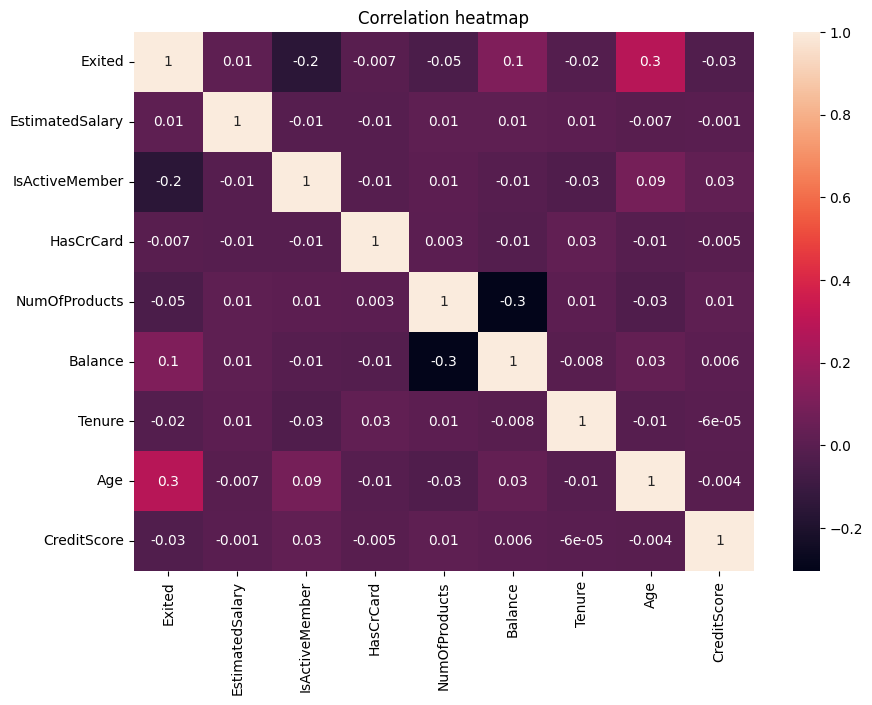

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.0g').set_title('Correlation heatmap');

There is no strong correlation between variables. Multicollinearity is excluded.

In [15]:
#let's remove the variables that won't give us any useful information
del data['RowNumber']
del data['CustomerId']
del data['Surname']

Let's check the distribution of the response variable first.

In [16]:
data['Exited'].value_counts() 

Exited
0    7963
1    2037
Name: count, dtype: int64

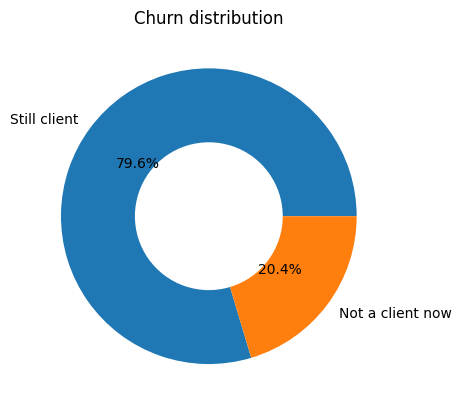

In [17]:
vals = [7963, 2037]
labels = ["Still client", "Not a client now"]
plt.title('Churn distribution')
plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

79.6 % or 7963 are the current clients and 20.4 % or 2037 are not the bank's clients anymore.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


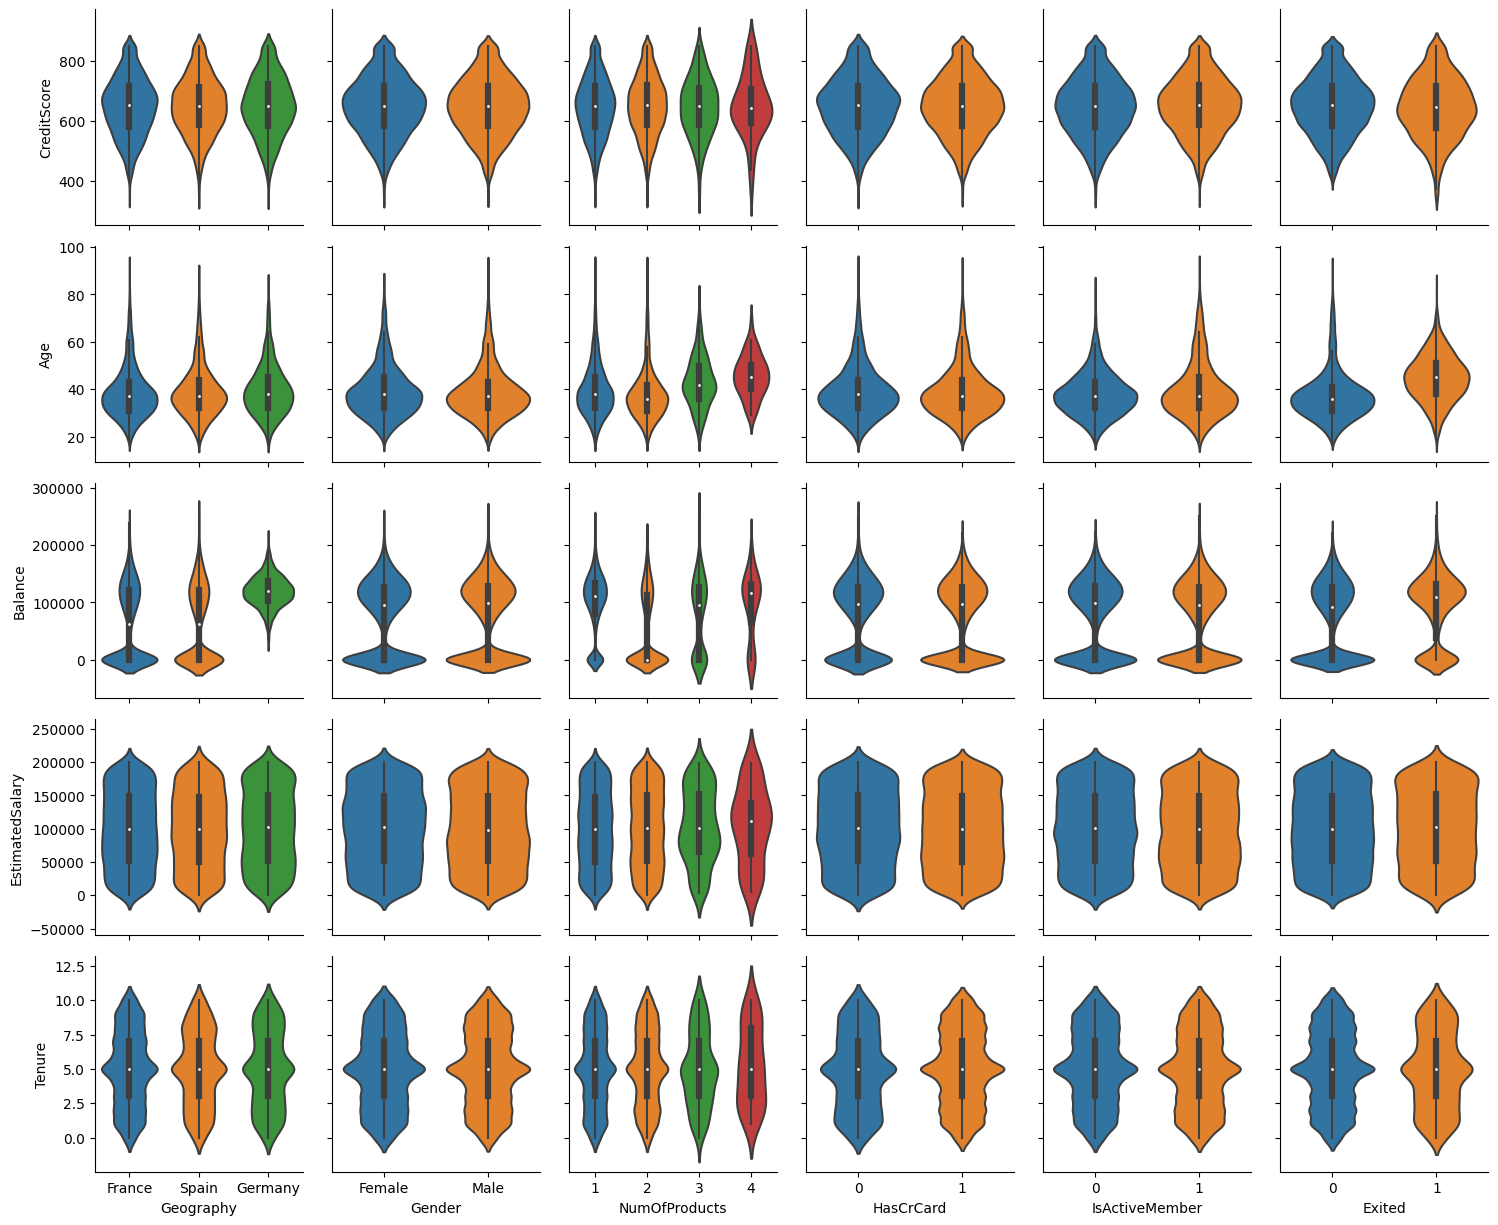

In [19]:
#let's check 

num_var = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
cat_var = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

g = sns.PairGrid(data, x_vars=cat_var, y_vars=num_var)
g.map(sns.violinplot);

So, among people who left the bank had more bank products, their salary range was higher than for those who stayed with the bank. People who left the bank had more money on their bank accounts in comparison with those who left. Around half of the left clients were at the age under 52, while for those who stayed with the bank the median age is less than 38 years old. The lowest credit score was for the left clients.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


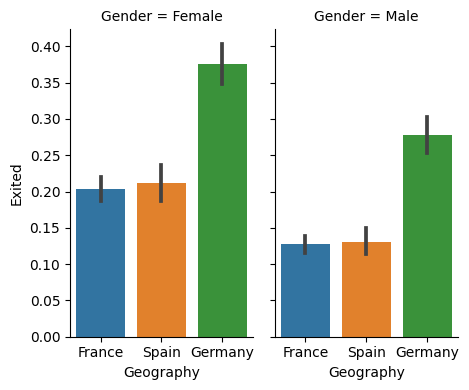

In [20]:
sns.catplot(data=data, x='Geography', y='Exited', col = 'Gender', kind='bar', height=4, aspect=0.6);

Both females and males from Germany is the main part of the clients. Women from all the countries tend to leave the bank more often.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


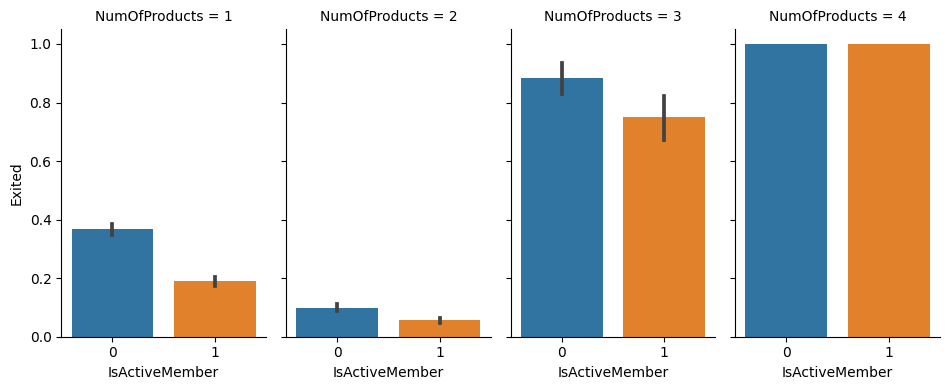

In [21]:
sns.catplot(data=data, x='IsActiveMember', y='Exited', col = 'NumOfProducts', kind='bar', height=4, aspect=0.6);

Among those who tend to leave there are quite a lot of people with 3 and 4 bank products. Interestingly, the majority of the clients with even 3 bank products aren't the active members of the bank, but, at the same time, among customers who have 4 bank products 50 % are the active members, and 50 % are not.

Let's also check the distribution of all the numerical variables

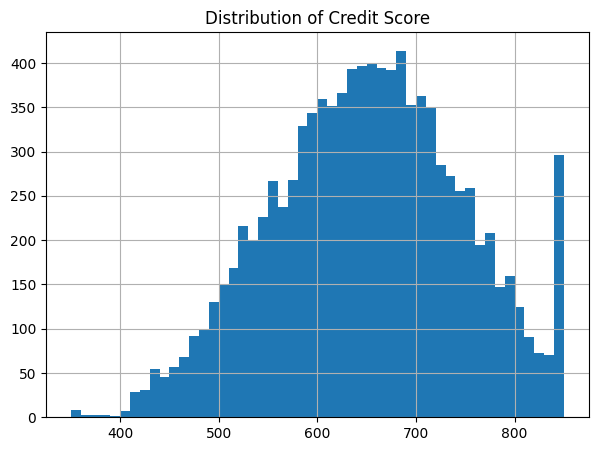

In [22]:
fig,ax=plt.subplots(figsize=(7,5))
plt.title('Distribution of Credit Score')
data['CreditScore'].hist(bins=50, range = (350, 850));

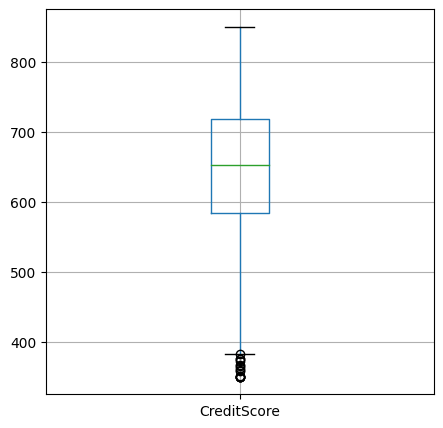

In [23]:
data.boxplot('CreditScore', figsize=(5,5));

There are abnormally low values less than 400 in the Credit Score parameter.

In [24]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

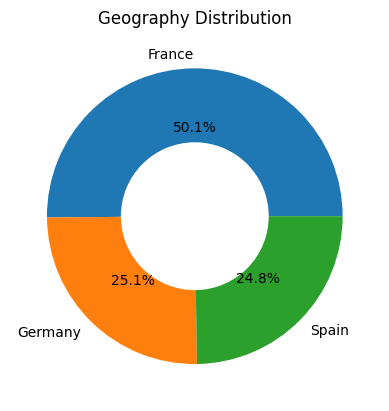

In [25]:
vals = [5014, 2509, 2477]
labels = ["France", "Germany", "Spain"]
plt.title('Geography Distribution')
plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

Half of the bank's clients are from France, 25.1 % or 2509 people are from Germany, and 24.8 % or 2477 customers are Spanish.

In [26]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

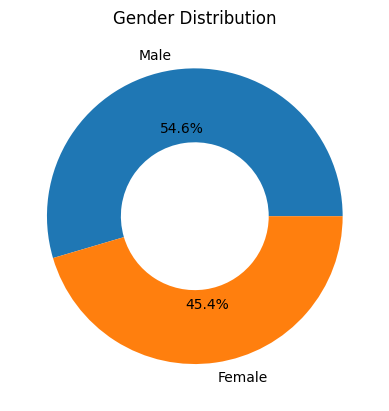

In [27]:
vals = [5457, 4543]
labels = ["Male", "Female"]
plt.title('Gender Distribution')
plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

The majority of the customers are males (54.6 % or 5457 people), and 45.4 % or 4543 clients are females.

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

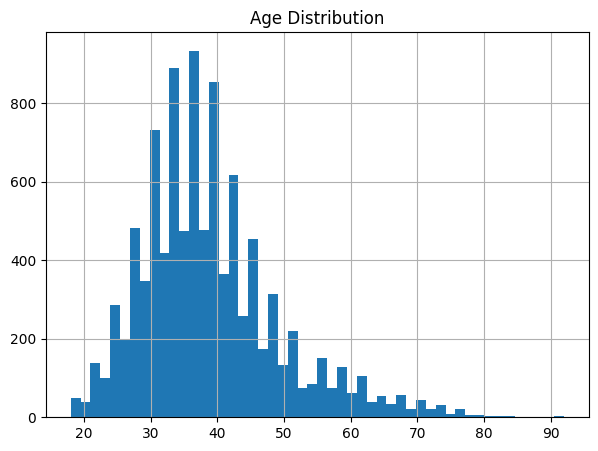

In [28]:
fig,ax=plt.subplots(figsize=(7,5))
plt.title('Age Distribution')
data['Age'].hist(bins=50, range = (18, 92))
data['Age'].describe()

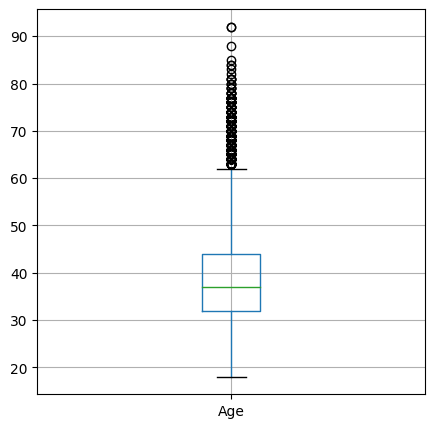

In [29]:
data.boxplot('Age', figsize=(5,5));

Mostly, the age range of the clients is from 22 up to 62 years old.

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64

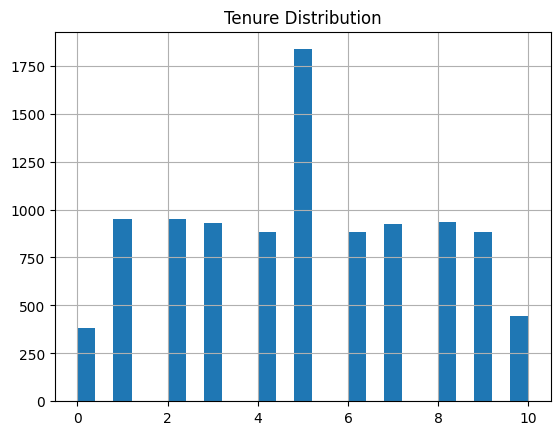

In [30]:
plt.title('Tenure Distribution')
data['Tenure'].hist(bins=25, range = (0, 10)) 
data['Tenure'].describe()

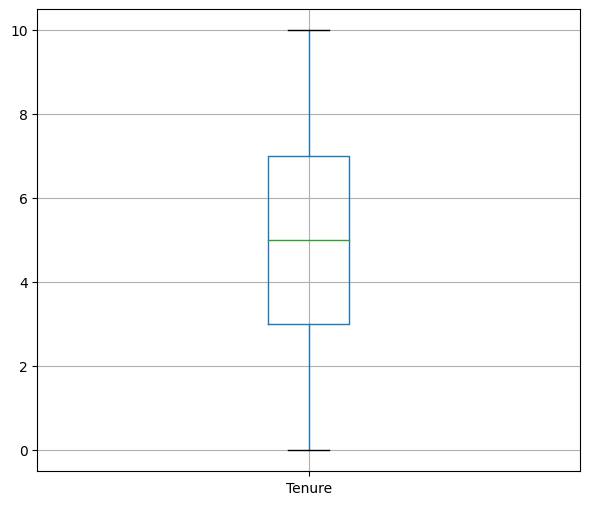

In [31]:
data.boxplot('Tenure', figsize=(7,6));

Half of the clients have been with the bank for 5 years

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

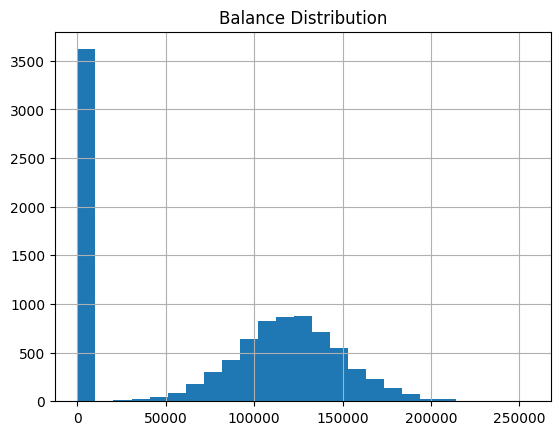

In [32]:
plt.title('Balance Distribution')
data['Balance'].hist(bins=25, range = (0, 255000)) 
data['Balance'].describe()

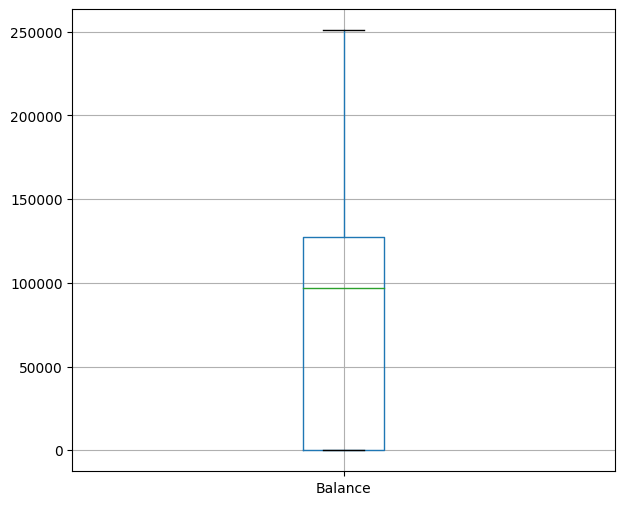

In [33]:
data.boxplot('Balance', figsize=(7,6));

For the Balance variable, 25 % of the clients don't keep any money in the bank, and 75 % of the customers keep around 127644 euros on their accounts.

In [34]:
data['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

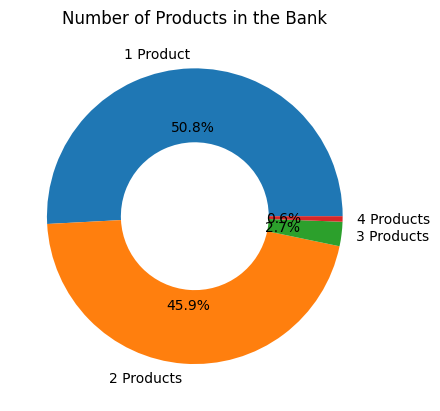

In [35]:
vals = [5084, 4590, 266, 60]
labels = ["1 Product", "2 Products", "3 Products", "4 Products"]
plt.title('Number of Products in the Bank')
plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

The majority of the clients (50.8% or 5084 individuals) has the only 1 bank product, 45.9 % or 4590 clients have 2 bank products. And only 2.7 % or 266 clients have 3 bank products. 0.6 % or 60 clients have 4 bank products. 

In [36]:
data['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

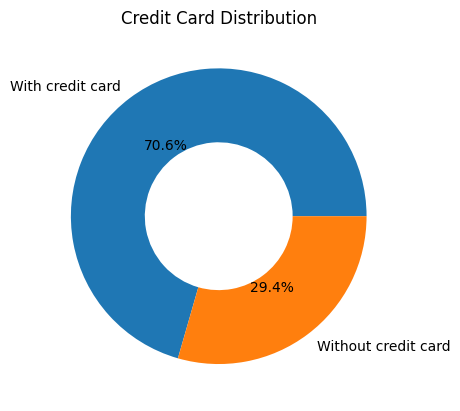

In [37]:
vals = [7055, 2945]
labels = ["With credit card", "Without credit card"]
plt.title('Credit Card Distribution')
plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

70.6 % or 7055 have credit card, and 29.4 % or 2945 customers don't have it.

In [38]:
data['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

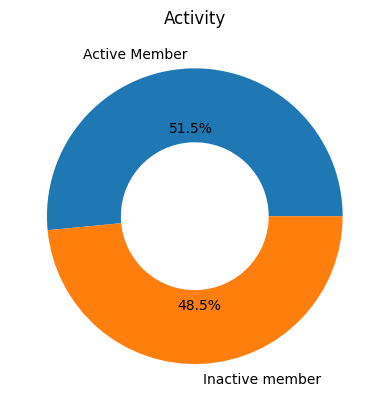

In [39]:
vals = [5151, 4849]
labels = ["Active Member", "Inactive member"]
plt.title('Activity')
plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

5151 clients (51.5%) are the active bank members, and 48.5 % (4849 customers) are not.

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

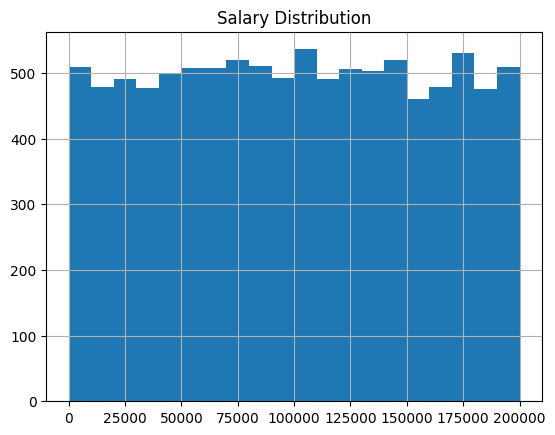

In [40]:
plt.title('Salary Distribution')
data['EstimatedSalary'].hist(bins=20, range = (11, 200000)) 
data['EstimatedSalary'].describe()

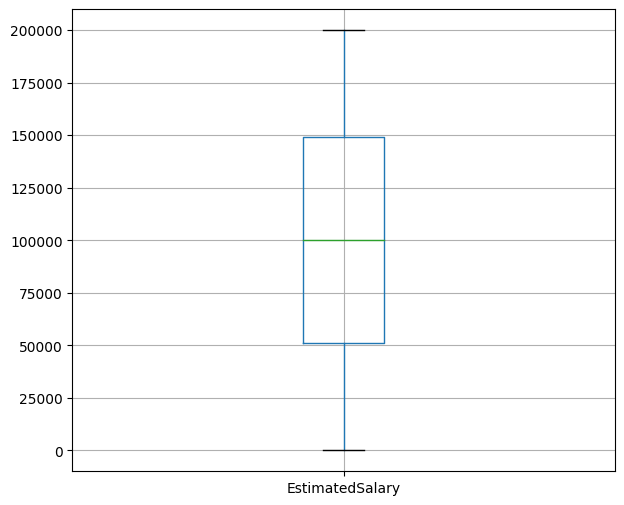

In [41]:
data.boxplot('EstimatedSalary', figsize=(7,6));

Estimated Salary data are well distributed. Mean and Median values are around 100000 euros.

In [42]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Let's work with categorical data

In [44]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We have 2 categorical columns: Gender and Geography (a country of living). We can use one-hot encoding technique to change categorical data to numerical one.

In [45]:
data_ohe = pd.get_dummies(data, drop_first=True) #applying one-hot encoding 
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


During data preprocessing, we changed the data type in the Tenure column to the integer type. Replaced gaps in one of the columns. Unnecessary columns were removed. No duplicates were found. During the exploratory data analysis, no multicollinearity was revealed, there was no strong dependence between the variables, and during the study of factors, anomalous, rare data on columns with age and credit rating were discarded. Categorical characteristics were converted into quantitative ones using the One hot encoding technique.
Now we can move on to studying the problem.

# 2. Problem investigation

Let's divide the data into 3 parts: train, validation, and test parts.

In [46]:
train=data_ohe.sample(frac=0.6,random_state=12345) #60% data for the train part
test_and_valid=data_ohe.drop(train.index) #40% for the val and test parts
test, valid = train_test_split(test_and_valid, test_size = 0.5, random_state=12345)

In [47]:
train.shape

(6000, 12)

In [48]:
test.shape

(2000, 12)

In [49]:
valid.shape

(2000, 12)

In [50]:
#In each of the parts, let's divide data into target and features that will be used for training

features_train = train.drop(['Exited'], axis=1) 
target_train = train['Exited']

features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']
 
features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

Now we can change the scale of all the numerical features to the same one.

In [51]:
from sklearn.preprocessing import StandardScaler 
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.095446,0.692527,-0.711294,-1.207343,-0.934554,1,1,0.967598,False,True,False
1402,1.108213,-0.948724,1.088995,0.869462,-0.934554,1,0,-0.403069,False,False,True
8606,1.622597,0.306351,0.008821,-1.207343,0.789186,1,1,-0.447751,False,True,True
8885,0.192609,0.595983,-0.351237,0.426066,0.789186,1,1,1.004463,False,True,True
6494,0.511528,-1.045268,0.728937,-1.207343,0.789186,1,1,-1.356118,False,False,True


Let's check what the features are the most important.

[0.13493213 0.23476825 0.10714092 0.12880325 0.14351047 0.02308932
 0.03473361 0.13345215 0.02636228 0.01465144 0.01855617]


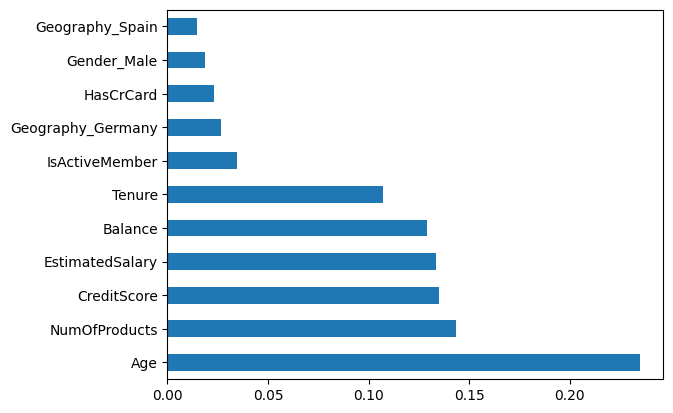

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features_train, target_train)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=features_train.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Age has the biggest impact on whether the customer stays in the bank or not. At the same time, having a credit card, country, gender, is the client is an active member or not don't influence that much.

Now we can move to the training part.

In [53]:
model_log_reg = LogisticRegression(random_state=12345, solver='liblinear')
model_log_reg.fit(features_train, target_train)

predicted_valid_log = model_log_reg.predict(features_valid)
accuracy_valid_log = accuracy_score(target_valid, predicted_valid_log)
accuracy_valid_log

0.81

In [54]:
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train)

predicted_valid_tree = model_tree.predict(features_valid)
accuracy_valid_tree = accuracy_score(target_valid, predicted_valid_tree)
accuracy_valid_tree

0.7705

In [55]:
model_rand_forest = RandomForestClassifier(random_state=12345)
model_rand_forest.fit(features_train, target_train)

predicted_valid_forest = model_rand_forest.predict(features_valid)
accuracy_valid_forest = accuracy_score(target_valid, predicted_valid_forest)
accuracy_valid_forest

0.8645

Let's check if the model works well trying to classify the data

In [56]:
class_share = data_ohe['Exited'].value_counts() / data_ohe['Exited'].count()
class_share

Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

<Axes: xlabel='Exited'>

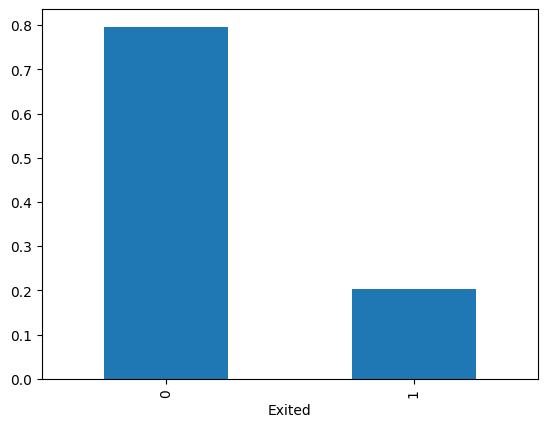

In [57]:
class_share.plot(kind='bar')

So, accuracy of the best model so far (random forest) = 0.85 is higher than accuracy of the appearing 0 (0.8). It means that the random forest model works well => we can use this model for predictions.

Let's check the class shares based on the predicted values in the best model.

0    0.8795
1    0.1205
Name: count, dtype: float64


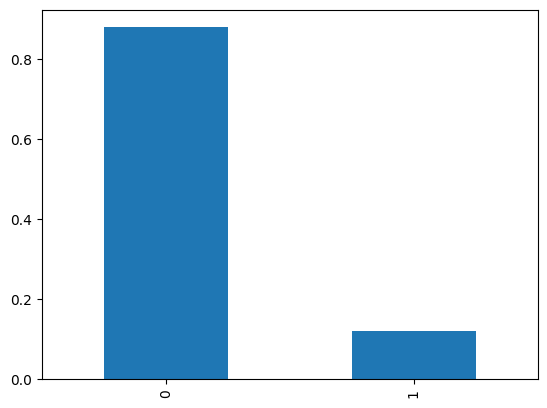

In [58]:
predicted_valid_forest = pd.Series(model_rand_forest.predict(features_valid))

class_share = predicted_valid_forest.value_counts() / predicted_valid_forest.count()
print(class_share)
class_share.plot(kind='bar');

We can see that there is class imbalance. The number of clients who stayed with the bank 9 times more than those who left the bank. To improve the model, we can try to get rid of imbalance.

Let's also create the Confusion Matrix to estimate the performance of the model. 

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_valid, predicted_valid_forest)

array([[1538,   50],
       [ 221,  191]])

According to our model, there are 1447 true negative responses when the predicted and actual value of the class are negative (that is, customers remaining in the bank). There were 193 true positive responses (clients who left the bank based on predicted values and actual values). There were 222 false negative responses (the number of responses was defined as '0', but should have been '1', i.e. the model determined that the client stayed, but in fact left). There were 63 false positive responses (when the model predicted '1' - the client left, but in reality - '0' - the client remained).

In [60]:
#let's find the recall score
from sklearn.metrics import recall_score
recall_score(target_valid, predicted_valid_forest)

0.46359223300970875

The model selected only 43 % positive results out from all the results.

In [61]:
#now we can find the precision score as well
from sklearn.metrics import precision_score
precision_score(target_valid, predicted_valid_forest)

0.7925311203319502

The model found 75 % negative results out of all the results. 

In [62]:
#now we can find f1-measure that combines precision and recall scores and takes their harmonic mean
from sklearn.metrics import f1_score
f1_score(target_valid, predicted_valid_forest)

0.5849923430321593

In [63]:
#let's calculate AUC_ROC and compare it with the f1-measure
probabilities_valid = model_rand_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8432509598689197

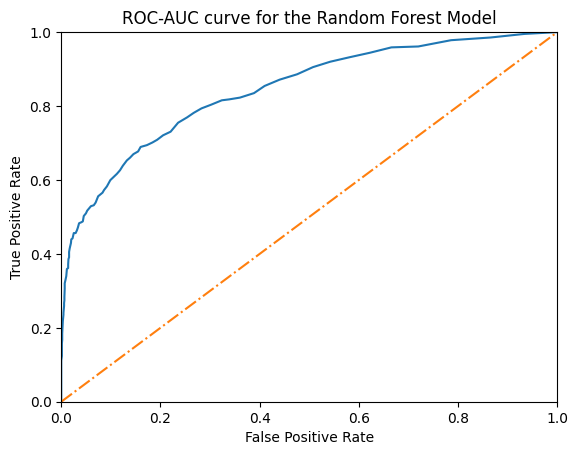

In [64]:
#now we can built ROC curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

#roc curve 
plt.plot([0, 1], [0, 1], linestyle='-.')

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")  
plt.title("ROC-AUC curve for the Random Forest Model") 

plt.show()

F1-score is around 0.55, and the area under curve is close to 1 (0.81).

Let's check f1 and AUC-ROC for the logistic regression and the decision tree.

In [65]:
f1_score(target_valid, predicted_valid_log)

0.304029304029304

In [66]:
probabilities_valid = model_log_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.777559548555917

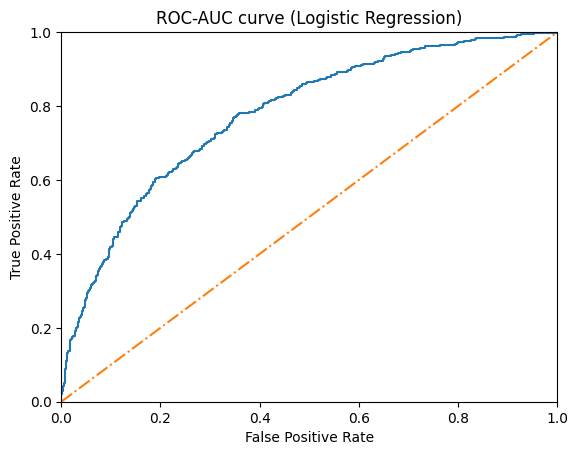

In [67]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()


plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='-.')

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0]) 

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title ("ROC-AUC curve (Logistic Regression)") 

plt.show()

In [68]:
f1_score(target_valid, predicted_valid_tree)

0.46063454759106937

In [69]:
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.6613527426573085

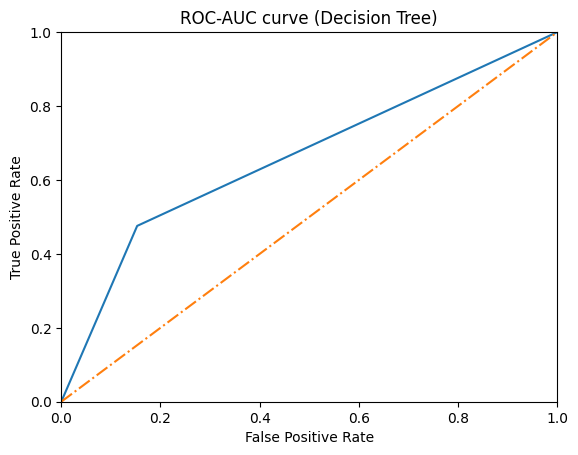

In [70]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='-.')

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")  
plt.title ("ROC-AUC curve (Decision Tree)")

plt.show()

In both models, the f1-measure became lower, as did the AUC-ROC.

We divided the data into training, validation and test sets. So far, at this stage, the best model is the random forest model with an f1-measure of about 0.55, while the value of the area under the ROC error curve is 0.81. Accuracy (proportion of correct answers) according to this model is 0.85. The model is adequate for use. A strong class imbalance has been identified, let's move on to processing it and try to improve the value of the f1-measure.

# 3. Imbalance

At the first stage, we will try to balance the classes in the models.

In [71]:
model_balanced_log = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_balanced_log.fit(features_train, target_train)
predicted_valid_log = model_balanced_log.predict(features_valid)
f1_score(target_valid, predicted_valid_log)

0.501283147989735

In [72]:
model_balanced_tree = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_balanced_tree.fit(features_train, target_train)
predicted_valid_tree = model_balanced_tree.predict(features_valid)
f1_score(target_valid, predicted_valid_tree)

0.46798029556650245

In [73]:
model_balanced_forest = RandomForestClassifier(random_state=12345, class_weight='balanced')
model_balanced_forest.fit(features_train, target_train)
predicted_valid_forest = model_balanced_forest.predict(features_valid)
f1_score(target_valid, predicted_valid_forest)

0.5816485225505443

In [74]:
probabilities_valid = model_balanced_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8467174928468367

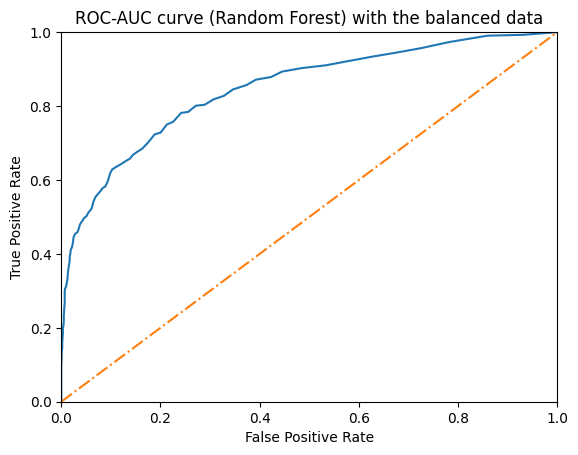

In [75]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='-.')

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate") 
plt.title ("ROC-AUC curve (Random Forest) with the balanced data")

plt.show()

For the best model, f1-measure decreased from 0.55 to 0.52. So, we don't need to consider this method anymore. Let's try other approaches.

Another way to tackle with the imbalanced data is increasing the sample.

In [76]:
from sklearn.utils import shuffle

In [77]:
#let's divide data into negative and positive ones, then we can copy positive results a few times
#then we can create new increased samples and shuffle the data
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 5)
print(features_upsampled.shape)
print(target_upsampled.shape)

(10772, 11)
(10772,)


In [78]:
class_share = target_upsampled.value_counts() / target_upsampled.count()
class_share

Exited
1    0.55375
0    0.44625
Name: count, dtype: float64

Let's train the random forest model using new set of data.

In [79]:
model_forest_up = RandomForestClassifier(random_state=12345)
model_forest_up.fit(features_upsampled, target_upsampled) 
predicted_valid = model_forest_up.predict(features_valid)

f1_score(target_valid, predicted_valid)

0.5959731543624162

In [80]:
probabilities_valid = model_forest_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8442261133256707

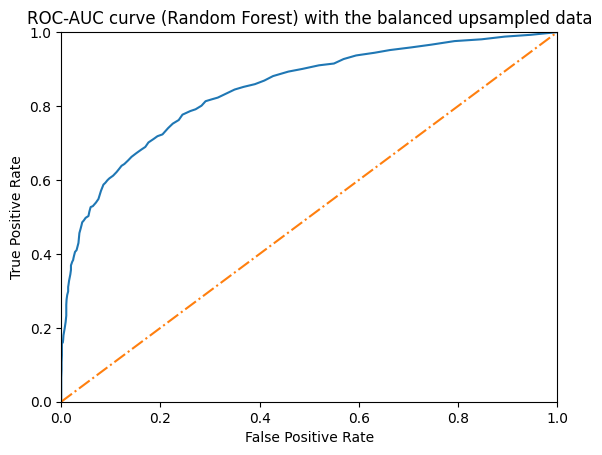

In [81]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='-.')

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title ("ROC-AUC curve (Random Forest) with the balanced upsampled data") 

plt.show()

The results are becoming better. Now we can apply the opposite approach - downsampling.

In [82]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.45)
print(features_downsampled.shape)
print(target_downsampled.shape)

(3356, 11)
(3356,)


In [83]:
class_share = target_downsampled.value_counts() / target_downsampled.count()
class_share

Exited
0    0.644517
1    0.355483
Name: count, dtype: float64

In [84]:
model_forest_down = RandomForestClassifier(random_state=12345)
model_forest_down.fit(features_downsampled, target_downsampled)
predicted_valid = model_forest_down.predict(features_valid)

f1_score(target_valid, predicted_valid)

0.6041666666666667

We obtained the best f1 score using the downsampling method. Now we can move forward and find the best number of trees and tree depth in the random forest.

In [85]:
for i in range(2,21):
    model_forest_down2 = RandomForestClassifier(random_state=12345, n_estimators=i, min_samples_split =10, min_samples_leaf =5)

    model_forest_down2.fit(features_downsampled, target_downsampled) 
    
    predicted_valid = model_forest_down2.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    print('n_estimators = ' + str(i) + '. f1 = ' + str(f1))

n_estimators = 2. f1 = 0.5378531073446328
n_estimators = 3. f1 = 0.5623582766439909
n_estimators = 4. f1 = 0.5740956826137689
n_estimators = 5. f1 = 0.5887850467289719
n_estimators = 6. f1 = 0.5959952885747939
n_estimators = 7. f1 = 0.5924170616113744
n_estimators = 8. f1 = 0.5914489311163895
n_estimators = 9. f1 = 0.6007067137809187
n_estimators = 10. f1 = 0.6106508875739645
n_estimators = 11. f1 = 0.6084905660377359
n_estimators = 12. f1 = 0.6070588235294118
n_estimators = 13. f1 = 0.6056338028169014
n_estimators = 14. f1 = 0.6054181389870434
n_estimators = 15. f1 = 0.6056338028169014
n_estimators = 16. f1 = 0.6040428061831153
n_estimators = 17. f1 = 0.6109785202863962
n_estimators = 18. f1 = 0.6093189964157706
n_estimators = 19. f1 = 0.6128266033254157
n_estimators = 20. f1 = 0.6078665077473183


In [86]:
for i in range (2, 21):
    model_forest_down2 = RandomForestClassifier(random_state=12345, max_depth=i, min_samples_split =10, min_samples_leaf =5)

    model_forest_down2.fit(features_downsampled, target_downsampled)
    
    predicted_valid = model_forest_down2.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    print('depth = ' + str(i) + '. f1 = ' + str(f1))

depth = 2. f1 = 0.49833887043189373
depth = 3. f1 = 0.5900709219858156
depth = 4. f1 = 0.5953991880920163
depth = 5. f1 = 0.6034712950600801
depth = 6. f1 = 0.6075619295958278
depth = 7. f1 = 0.6067415730337078
depth = 8. f1 = 0.6041923551171393
depth = 9. f1 = 0.6168674698795181
depth = 10. f1 = 0.6115107913669064
depth = 11. f1 = 0.611764705882353
depth = 12. f1 = 0.6083916083916084
depth = 13. f1 = 0.6102502979737783
depth = 14. f1 = 0.5992949471210341
depth = 15. f1 = 0.6202830188679246
depth = 16. f1 = 0.6195524146054181
depth = 17. f1 = 0.6190476190476191
depth = 18. f1 = 0.6153846153846154
depth = 19. f1 = 0.6179245283018868
depth = 20. f1 = 0.6161137440758294


In [87]:
model_forest_control = RandomForestClassifier(random_state=12345, max_depth=19, n_estimators=19)
model_forest_control.fit(features_downsampled, target_downsampled)
predicted_valid = model_forest_control.predict(features_valid)

f1_score(target_valid, predicted_valid)

0.5810185185185185

In [88]:
probabilities_valid = model_forest_control.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8303943716221174

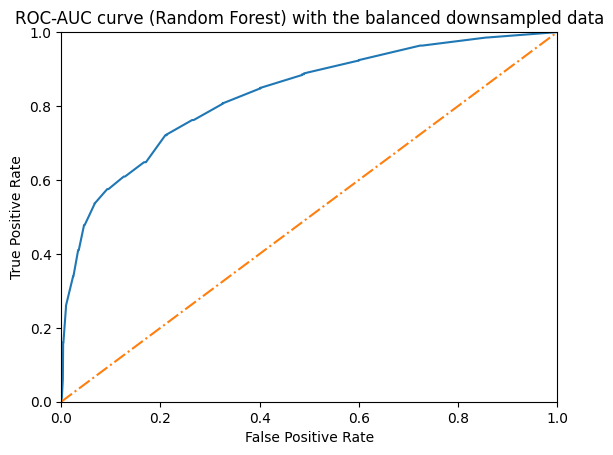

In [89]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='-.')

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0]) 

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title ("ROC-AUC curve (Random Forest) with the balanced downsampled data")

plt.show()

#### We got the best  f1 score on the validation data using the downsampling method and random forest model. F1-measure is around 0.58, AUC-ROC is around 0.83. Now we can do the final testing  of the model.

# 4. Model Testing

In [90]:
predicted_test_forest = model_forest_control.predict(features_test)
f1_score(target_test, predicted_test_forest)

0.5928489042675895

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(predicted_test_forest, target_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1565
           1       0.59      0.59      0.59       435

    accuracy                           0.82      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.82      0.82      0.82      2000



### According to the classification report, trying to predict whether the customer is going to leave the bank or not, we obtained the following results: the best model is the random forest one (f1-score=0.59, recall=0.59, precision=0.59). Weighted Accuracy = 0.82.